# Deep Learning - Multilayer Perceptron(MLP)
## About
A multilayer perceptron(MLP) is a class of feedforward artificial neural network. A MLP consists of at least three layers of nodes: an **input layer**, a **hidden layer** and an **output layer**. Except for the input nodes, each node is a neuron that uses a nonlinear **activation function**.

## Linear Regression, Logistic Regression, and MLP
![](../images/Logistic_regression_vs_MLP.png)

## Backpropagation
Backpropagation algorithms are a family of methods used to efficiently train artificial neural networks (ANNs) following a **gradient descent approach** that exploits the **chain rule**. The main feature of backpropagation is its iterative, recursive and efficient method for calculating the weights updates to improve the network until it is able to perform the task for which it is being trained.

![](https://www.guru99.com/images/1/030819_0937_BackPropaga1.png)

## MNIST OCR Example

In [37]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


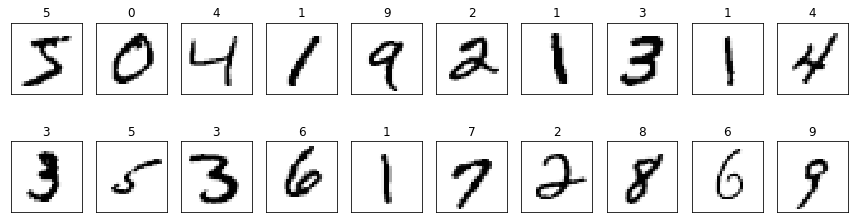

In [28]:
plt.figure(figsize=(15, 4))
for digit in range(20):
    plt.subplot(2, 10, digit + 1)
    plt.xticks([]); plt.yticks([])
    plt.title(y_train[digit])
    plt.imshow(x_train[digit], cmap='Greys')

In [30]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

input_shape = (28, 28, 1)

# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('Number of images in x_train =', x_train.shape[0])
print('Number of images in x_test =', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train = 60000
Number of images in x_test = 10000


In [43]:
# Create networks.
model = Sequential()
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(64, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [44]:
# Train networks.
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.8113 - acc: 0.7584
Epoch 2/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.3815 - acc: 0.8890
Epoch 3/10
60000/60000 [==============================] - 5s 85us/step - loss: 0.3203 - acc: 0.9073
Epoch 4/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2777 - acc: 0.9191
Epoch 5/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2447 - acc: 0.9287
Epoch 6/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.2167 - acc: 0.9376
Epoch 7/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1928 - acc: 0.9437
Epoch 8/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1732 - acc: 0.9494
Epoch 9/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1578 - acc: 0.9538
Epoch 10/10
60000/60000 [==============================] - 5s 84us/step - loss: 0.1434 - acc: 0.9571

In [45]:
# Test networks
loss, metrics = model.evaluate(x_test, y_test)
print('loss =', loss)
print('metrics =', metrics)

10000/10000 [==============================] - 0s 28us/step
loss = 0.15031773093417286
metrics = 0.9552


## XOR Problem Example

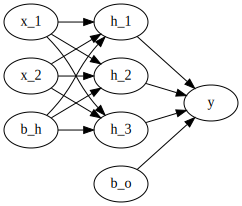

In [1]:
try:
    from graphviz import Digraph
    dot = Digraph(format='png')
    dot.attr(rankdir='LR')
    dot.body.append("""
    "x_1" -> "h_1"; "x_1" -> "h_2"; "x_1" -> "h_3"
    "x_2" -> "h_1"; "x_2" -> "h_2"; "x_2" -> "h_3"
    "b_h" -> "h_1"; "b_h" -> "h_2"; "b_h" -> "h_3"
    "h_1" -> "y"; "h_2" -> "y"; "h_3" -> "y"
    "b_o" -> "y"
    """)
except:
    dot = None
dot

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time

/mnt/2ce1d30e-9805-44ab-9067-196fda7f55c5/venv/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/mnt/2ce1d30e-9805-44ab-9067-196fda7f55c5/venv/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/mnt/2ce1d30e-9805-44ab-9067-196fda7f55c5/venv/3.6/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)]

In [2]:
hidden_size = 4

# Define input and output placeholders.
X = tf.placeholder(tf.float32, shape=[1, 2], name = 'X')
Y = tf.placeholder(tf.float32, shape=[1, 1], name = 'Y')

# Define weight and bias variables.
W_h = tf.Variable(tf.truncated_normal([2, hidden_size]), name = "W_h")
W_o = tf.Variable(tf.truncated_normal([hidden_size, 1]), name = "W_o")
b_h = tf.Variable(tf.zeros([1, hidden_size]), name = "b_h")
b_o = tf.Variable(tf.zeros([1, 1]), name = "b_o")

In [3]:
N = 4

# Set training data.
INPUT_XOR = [[0,0], [0,1], [1,0], [1,1]]
OUTPUT_XOR = [[0], [1], [1], [0]]

# Define hidden and output layer.
with tf.name_scope("hidden_layer") as scope:
    H = tf.nn.relu(tf.add(tf.matmul(X, W_h), b_h))
with tf.name_scope("output") as scope:
    Y_estimated = tf.sigmoid(tf.add(tf.matmul(H, W_o), b_o))
    
# Define loss function.
with tf.name_scope("loss") as scope:
    loss = tf.reduce_mean(tf.squared_difference(Y_estimated, Y))
    
# Select optimizer.
with tf.name_scope("train") as scope:
    train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

# Begin session.
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)
losses = []

In [4]:
start_time = time.time()

# Start training.
for epoch in range(10001):
    for i in range(N):
        sess.run(train_step, feed_dict={X: INPUT_XOR[i:i+1], Y: OUTPUT_XOR[i:i+1]})

    if epoch % 1000 == 0:
        loss_value = 0
        for i in range(N):
            loss_value += sess.run(loss, feed_dict={X: INPUT_XOR[i:i+1], Y: OUTPUT_XOR[i:i+1]})

        loss_value /= N
        losses.append(loss_value)
        print('Epoch:', epoch, 'loss:', loss_value)

print('Elapsed time =', time.time() - start_time)

Epoch: 0 loss: 0.2615837436169386
Epoch: 1000 loss: 0.16776131093502045
Epoch: 2000 loss: 0.04272265289910138
Epoch: 3000 loss: 0.014403684996068478
Epoch: 4000 loss: 0.00797111343126744
Epoch: 5000 loss: 0.005315481452271342
Epoch: 6000 loss: 0.0039191716350615025
Epoch: 7000 loss: 0.0030728920246474445
Epoch: 8000 loss: 0.0025113433657679707
Epoch: 9000 loss: 0.0021146384096937254
Epoch: 10000 loss: 0.001820470206439495
Elapsed time = 40.04807424545288


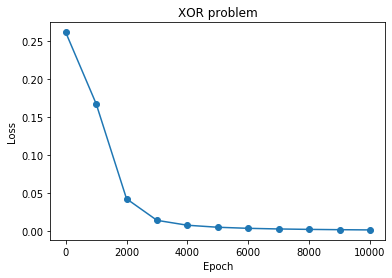

In [5]:
x = np.array(range(len(losses))) * 1000
plt.plot(x, losses, 'o-')
plt.title('XOR problem')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

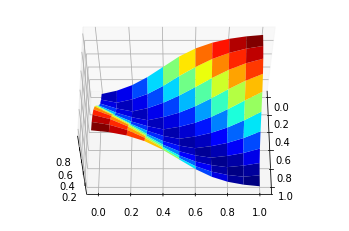

In [6]:
X1, X2 = np.meshgrid(np.linspace(0.0, 1.0, 11), np.linspace(0.0, 1.0, 11))
test_X = np.array([X1, X2]).T.reshape(-1, 2)
test_Y = np.zeros(shape=(121,1))

for i in range(121):
    test_Y[i] = sess.run(Y_estimated, feed_dict={X: test_X[i:i+1]})

test_Y = test_Y.reshape(11, 11)

from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.plot_surface(X1, X2, test_Y, cmap='jet')
ax.view_init(60, 0)
plt.show()

In [211]:
sess.close()

## Reference
- https://en.wikipedia.org/wiki/Multilayer_perceptron
- https://skymind.ai/wiki/multilayer-perceptron
- https://en.wikipedia.org/wiki/Backpropagation
- https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d
- http://introtodeeplearning.com/
- https://medium.com/@claude.coulombe/the-revenge-of-perceptron-learning-xor-with-tensorflow-eb52cbdf6c60